In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import os
import pandas as pd
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/Train'
valid_path = '/content/drive/MyDrive/Dataset/Test'


In [6]:

#os.listdir(data)
Infected_train_images = glob(train_path+"/Infected/*.png")
Uninfected_train_images = glob(train_path+"/Uninfected/*.png")

Infected_test_images = glob(valid_path+"/Infected/*.png")
Uninfected_test_images = glob(valid_path+"/Uninfected/*.png")

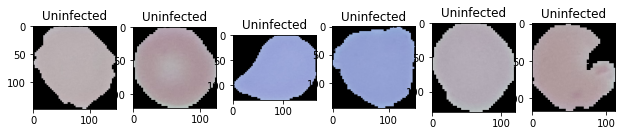

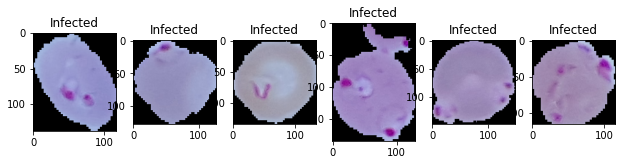

In [7]:
#Uninfected images
plt.figure(figsize=(14,14))
import random, cv2
for i in range(6):
    plt.subplot(2,8,i+1)
    type1="Uninfected"
    imgdir = train_path+"/"+type1
    imgfile = np.random.choice(os.listdir(imgdir))
    img = cv2.imread(imgdir+"/"+imgfile)
    plt.imshow(img)
    plt.title(type1)
plt.show()

#Infected images
plt.figure(figsize=(14,14))
for i in range(6):
    plt.subplot(2,8,i+1)
    type2="Infected"
    imgdir = valid_path+"/"+type2
    imgfile = np.random.choice(os.listdir(imgdir))
    img = cv2.imread(imgdir+"/"+imgfile)
    plt.imshow(img)
    plt.title(type2)
plt.show()

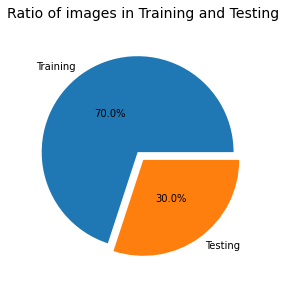

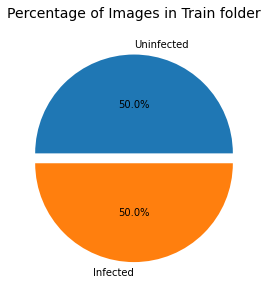

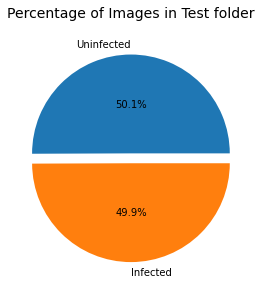

In [8]:
#Data visualization

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.pie(x=np.array([len(Infected_train_images+Uninfected_train_images), len(Infected_test_images+Uninfected_test_images)]), autopct="%.1f%%", explode=[0.1,0], labels=["Training", "Testing"], pctdistance=0.5)
plt.title("Ratio of images in Training and Testing\n", fontsize=14);

plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.pie(x=np.array([len(Infected_train_images), len(Uninfected_train_images)]), autopct="%.1f%%", explode=[0.1,0], labels=["Uninfected", "Infected"], pctdistance=0.5)
plt.title("Percentage of Images in Train folder\n", fontsize=14);

plt.figure(figsize=(15, 10))
plt.subplot(2,1,2)
plt.pie(x=np.array([len(Infected_test_images), len(Uninfected_test_images)]), autopct="%.1f%%", explode=[0.1,0], labels=["Uninfected", "Infected"], pctdistance=0.5)
plt.title("Percentage of Images in Test folder\n", fontsize=14);

In [9]:
res = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


219070464/219055592 [==============================] - 1s 0us/step


In [10]:
for layer in res.layers:
    layer.trainable = False

In [11]:
folders = glob('/content/drive/MyDrive/Dataset/Train/*')

In [12]:
folders

['/content/drive/MyDrive/Dataset/Train/Infected',
 '/content/drive/MyDrive/Dataset/Train/Uninfected']

In [13]:
x = Flatten()(res.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=res.input, outputs=prediction)

In [15]:
#model.summary()


In [16]:
from tensorflow.keras.layers import MaxPooling2D

In [17]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_203 (Conv2D)          (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [18]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,                  
                                   shear_range = 0.2,
                                   zoom_range = 0.2,                      
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 19290 images belonging to 2 classes.


In [21]:
training_set

In [22]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8278 images belonging to 2 classes.


In [24]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
  2/603 [..............................] - ETA: 15:49 - loss: 0.2040 - accuracy: 0.9375

KeyboardInterrupt: ignored

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#from tensorflow.keras.models import load_model

#model.save('model_resnet.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet.h5')

In [ ]:
#img=image.load_img('Dataset/Test/Parasite/4.png',target_size=(224,224))
img=image.load_img('Dataset/Test/Uninfected/4.png',target_size=(224,224))

img

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
a

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")